In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("movies_metadata.csv")

C:\Users\jungh\.conda\envs\test3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. adult  
False인 관측치만 냅두고 나머지는 다 제거함

In [3]:
data=data[data["adult"]=="False"]

2. belongs_to_collection  
collection이 있는 관측치는 collection name만 뽑아서 저장.

In [4]:
collection=[]
for string in data["belongs_to_collection"]:
    if type(string)==float:
        collection.append(float("Nan"))
    else:
        col_dict=eval(string)
        collection.append(col_dict["name"])

In [5]:
data["belongs_to_collection"]=collection

3. budget  
type을 flaot으로 변경

In [6]:
data["budget"]=pd.to_numeric(data["budget"])

4. genres  
genres name만 포함하는 리스트 형태로 저장

In [7]:
# eval(data["genres"][0])

In [8]:
genres=[]
for string in data["genres"]:
    genres_list=eval(string)
    if len(genres_list)==0:
        genres.append(float("Nan"))
    else:
        genres2=[]
        for genres_dict in genres_list:
            genres_name=genres_dict["name"]
            genres2.append(genres_name)
        genres.append(genres2)

In [9]:
data["genres"]=genres

5. homepage  
변수 삭제

In [10]:
del data["homepage"]

6. id  
type를 object에서 int로 변경 후 같은 값 갖는 관측치는 하나만 남겨놓고 삭제

In [11]:
data["id"]=pd.to_numeric(data["id"],errors='coerce')

In [12]:
data=data.drop_duplicates(["id"],keep="first")

7. imdb_id  
기존에 존재하던 중복행은 위의 전처리 과정들에서 모두 해결

영화별 고유값같은데 이미 id가 그 역할 해주고 있으니깐 그냥 제거

In [13]:
del data["imdb_id"]

8. original_language  
모든 변수 전처리 끝난 후에 영어 영화만 따로 모은 데이터 추출 예정  
Nan인 애들은 뒤에 spoken_language 변수 정리할때 다시 처리  

우선 냅두고 넘어간 다음에 뒤에가서 지정해줄게요!

9. original_title  
위에서 중복행은 제거해줬기 때문에 같은 제목으로 나오는 영화들은 모두 다른 영화

10. overview

In [14]:
text_counts = data["overview"].value_counts()
text_list = text_counts[text_counts > 1].index.tolist()

In [15]:
overview_list=[]
for overview in data["overview"]:
    if overview=="No overview found.":
        overview_list.append("")
    elif overview=="No Overview":
        overview_list.append("")
    elif overview==" ":
        overview_list.append("")
    elif overview=="No movie overview available.":
        overview_list.append("")
    else:
        overview_list.append(overview)

In [16]:
data["overview"]=overview_list

11. popularity  
type을 object에서 numeric으로 변환

In [17]:
data["popularity"]=pd.to_numeric(data["popularity"],errors='coerce')

12. poster_path  
제거

In [18]:
del data["poster_path"]

13. production_companies

In [19]:
companies=[]
for string in data["production_companies"]:
    if type(string)==float:
        companies.append(float("Nan"))
    else:
        companies_list=eval(string)
        if len(companies_list)==0:
            companies.append(float("Nan"))
        else:
            companies2=[]
            for companies_dict in companies_list:
                companies_name=companies_dict["name"]
                companies2.append(companies_name)
            companies.append(companies2)

In [20]:
data["production_companies"]=companies

14. production_countries

In [21]:
countries=[]
for string in data["production_countries"]:
    if type(string)==float:
        countries.append(float("Nan"))
    else:
        countries_list=eval(string)
        if len(countries_list)==0:
            countries.append(float("Nan"))
        else:
            countries2=[]
            for countries_dict in countries_list:
                countries_name=countries_dict["name"]
                countries2.append(countries_name)
            countries.append(countries2)

In [22]:
data["production_countries"]=countries

15. release_date  
datetime으로 변환

In [23]:
from datetime import datetime

In [24]:
date=[]
for string in data["release_date"]:
    if type(string)!=str:
        date.append(float("Nan"))
    else:
        date.append(datetime.strptime(string, "%Y-%m-%d"))

In [25]:
data["release_date"]=date

16. revenue  

In [26]:
data[pd.isnull(data["revenue"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[Action, Thriller, Drama]",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,Mardock Scramble Collection,0,"[Animation, Science Fiction]",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[TV Movie, Action, Horror, Science Fiction]",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


얘네는 Nan이 여러갠데 없애는게 낫지 않을까 싶어요!

17. runtime 

In [27]:
data[pd.isnull(data["runtime"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
634,False,NaN,0,[Comedy],287305,de,Peanuts – Die Bank zahlt alles,NaN,0.066123,[Westdeutscher Rundfunk (WDR)],...,1996-03-21,0.0,NaN,[],Released,NaN,Peanuts – Die Bank zahlt alles,False,4.0,1.0
635,False,NaN,0,[Comedy],339428,de,Happy Weekend,NaN,0.002229,[Senator Film Produktion],...,1996-03-14,65335.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,False,0.0,0.0
644,False,NaN,0,[Drama],278978,de,Und keiner weint mir nach,NaN,0.439989,NaN,...,1996-02-29,0.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Und keiner weint mir nach,False,0.0,0.0
802,False,NaN,0,[Drama],282919,de,Diebinnen,NaN,0.106345,NaN,...,1996-06-20,0.0,NaN,[],Released,NaN,Diebinnen,False,4.0,1.0
863,False,NaN,0,[Thriller],253632,fr,Baton Rouge,NaN,0.437895,NaN,...,1988-10-08,0.0,NaN,[],Released,NaN,Baton Rouge,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45246,False,NaN,0,[Comedy],231216,de,Villa Henriette,NaN,0.002513,NaN,...,2004-12-02,0.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Villa Henriette,False,0.0,0.0
45310,False,NaN,0,NaN,418757,pl,Między nami dobrze jest,NaN,0.030803,NaN,...,2014-08-01,0.0,NaN,[],Released,NaN,Między nami dobrze jest,False,0.0,0.0
45313,False,NaN,0,[Drama],369444,pl,Ostatni dzwonek,NaN,0.000102,NaN,...,1989-10-27,0.0,NaN,[],Released,NaN,Ostatni dzwonek,False,0.0,0.0
45377,False,NaN,0,[Adventure],317389,es,Simbad e il califfo di Bagdad,NaN,0.006352,"[Roas Produzioni, Buton Film]",...,1973-07-22,0.0,NaN,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Simbad e il califfo di Bagdad,False,0.0,0.0


얘네는 Nan이 많아서 그냥 냅둘게요. 0으로 대체하면 나중에 분석할 때 값이 달라질거 같아서요!

### 18. spoken_languages

In [28]:
language=[]
for string in data["spoken_languages"]:
    if type(string)!=str:
        language.append(float("Nan"))
    else:
        language_list=eval(string)
        if len(language_list)==0:
            language.append(float("Nan"))
        else:
            language2=[]
            for language_dict in language_list:
                language_name=language_dict["name"]
                language2.append(language_name)
            language.append(language2)

In [29]:
data["spoken_languages"]=language

In [30]:
for string in data["spoken_languages"]:
    if type(string)==list:
        for lan in string:
            if lan=="":
                string.remove("")

In [31]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                     []
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

: 45462처럼 빈 리스트를 어떻게 Nan으로 처리해야하는지 모르겠어요..

In [32]:
data = data.mask(data["spoken_languages"].map(str).eq('[]'))

In [33]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                    NaN
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

: 이렇게 하면 [ ]이 Nan으로 되는 것 같아요(45462)

19. status

In [34]:
data[pd.isnull(data["status"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
189,False,NaN,0.0,[Documentary],56088.0,en,The Show,A documentary about the culture of hip-hop. Th...,0.159596,NaN,...,1995-08-25,0.0,93.0,NaN,NaN,What Happens On Stage Is Only Half The Story!,The Show,False,5.3,2.0
767,False,NaN,0.0,[Documentary],52059.0,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,0.107050,NaN,...,1995-01-01,0.0,180.0,NaN,NaN,NaN,The Gate of Heavenly Peace,False,6.7,3.0
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,False,NaN,0.0,[Comedy],40506.0,en,Meet Wally Sparks,Wally Sparks is a tabloid TV show reporter who...,0.576741,NaN,...,1997-01-01,0.0,105.0,[English],NaN,NaN,Meet Wally Sparks,False,5.3,10.0
2140,False,NaN,0.0,NaN,77314.0,fr,The Cabinet of Dr. Ramirez,NaN,0.037500,NaN,...,1991-12-04,0.0,NaN,NaN,NaN,NaN,The Cabinet of Dr. Ramirez,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,False,NaN,0.0,"[Drama, Romance, Foreign]",49492.0,en,Jogwa - The Awakening,"Jogwa actually means alms given to a person, u...",0.004990,NaN,...,2009-09-25,0.0,92.0,NaN,NaN,The Awakening,Jogwa - The Awakening,False,0.0,0.0
45090,False,NaN,0.0,NaN,128268.0,en,Veruschka - Die Inszenierung (m)eines Körpers,Documentary about Veruschka von Lehndorff.,0.056298,NaN,...,2005-09-30,0.0,52.0,"[Deutsch, Français]",NaN,NaN,Veruschka: A Life for the Camera,False,6.0,1.0
45159,False,NaN,0.0,NaN,41811.0,en,Eating,"At a spacious house in Los Angeles, Helene is ...",0.000002,NaN,...,1990-11-30,0.0,110.0,[English],NaN,NaN,Eating,False,0.0,0.0
45442,False,NaN,0.0,NaN,44330.0,en,Le tripot clandestin,A combination gambling den and bawdy house is ...,0.219260,NaN,...,1905-01-01,0.0,3.0,NaN,NaN,NaN,The Scheming Gambler's Paradise,False,5.0,3.0


: Nan인 애들 중에 popularity나 revenue가 0인 아닌 애들은 개봉한거로 생각할 수 있으니깐 Released로 채울게요

20. tagline

In [35]:
data[pd.isnull(data["tagline"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
11,False,NaN,0.0,"[Comedy, Horror]",12110.0,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[Columbia Pictures, Castle Rock Entertainment,...",...,1995-12-22,0.0,88.0,"[English, Deutsch]",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0
27,False,NaN,0.0,"[Drama, Romance]",17015.0,en,Persuasion,This film adaptation of Jane Austen's last nov...,2.228434,[BBC Films],...,1995-09-27,0.0,104.0,[English],Released,NaN,Persuasion,False,7.4,36.0
32,False,NaN,0.0,"[Romance, Adventure]",78802.0,fr,"Guillaumet, les ailes du courage",NaN,0.745542,[Iwerks Entertainment],...,1996-09-18,0.0,50.0,[English],Released,NaN,Wings of Courage,False,6.8,4.0
35,False,NaN,11000000.0,[Drama],687.0,en,Dead Man Walking,A justice drama based on a true story about a ...,6.891317,"[Havoc, PolyGram Filmed Entertainment, Working...",...,1995-12-29,39363635.0,122.0,[English],Released,NaN,Dead Man Walking,False,7.3,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,NaN,0.0,[Science Fiction],222848.0,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,[Concorde-New Horizons],...,1995-01-01,0.0,85.0,[English],Released,NaN,Caged Heat 3000,False,3.5,1.0
45460,False,NaN,0.0,"[Drama, Action, Romance]",30840.0,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45464,False,NaN,0.0,NaN,227506.0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


: 어차피 텍스트마이닝에 쓸거라 Nan여도 냅둬도 될것 같아용

21. title

In [36]:
data[pd.isnull(data["title"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 아까 위에 나왔던 Nan 많던 세 행이랑 같아요

22. video

In [37]:
data[pd.isnull(data["video"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 계속 똑같은 행

In [38]:
data[data["video"]==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5492,False,NaN,0.0,"[Action, Adventure, Animation, Comedy, Family,...",15173.0,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.734181,[Big Idea Productions],...,2002-10-04,0.0,82.0,"[Český, English]",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0
11469,False,Loose Change Collection,5000.0,[Documentary],14277.0,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,0.651714,[Polar Film Medien GmbH],...,2006-06-01,0.0,100.0,[English],Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0
13564,False,NaN,0.0,[Documentary],284117.0,en,Fitna,A short film in which Quran verses are shown a...,0.040068,NaN,...,2008-03-27,0.0,15.0,"[English, Nederlands]",Released,NaN,Fitna,True,1.0,1.0
14271,False,Love Hina Collection,0.0,"[Comedy, Romance, Animation, Music]",44685.0,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",1.785708,"[TV Tokyo, Xebec]",...,2001-03-31,0.0,48.0,[日本語],Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0
14608,False,NaN,0.0,"[Action, Adventure, Family, Fantasy]",35148.0,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,NaN,...,2009-10-13,0.0,140.0,"[Français, English, Norsk, Português, ภาษาไทย,...",Released,NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,False,NaN,0.0,"[Action, Animation, Horror]",161337.0,en,Underworld: Endless War,Underworld: Endless War is a collection of thr...,3.301063,NaN,...,2011-10-19,0.0,18.0,[English],Released,NaN,Underworld: Endless War,True,5.6,38.0
44798,False,NaN,0.0,"[Animation, Horror, Science Fiction]",425916.0,en,Salad Fingers,"The adventures of Salad Fingers, an unspecifie...",0.141367,NaN,...,NaT,0.0,52.0,[English],Released,NaN,Salad Fingers,True,8.5,4.0
44861,False,NaN,0.0,NaN,334795.0,ru,Конец Каникул,Four music videos of Kino band joined together...,0.000000,NaN,...,1986-01-01,0.0,23.0,[Pусский],Released,Victor Tsoy's movie debut,The End of a Vacation,True,0.0,0.0
44981,False,NaN,0.0,"[Family, Drama, Comedy]",461088.0,fa,۵۰ کیلو آلبالو,When the corrupted groom starts shooting in th...,0.034119,NaN,...,2016-03-22,0.0,89.0,[فارسی],Released,NaN,50 Kilos of Sour Cherry,True,0.0,0.0


: video 라는 변수가 의미하는 바를 모르겠어서 그냥 버리는게 나을것 같긴 한데 우선 그냥 냅둘게용

23. vote_average

In [39]:
data[pd.isnull(data["vote_average"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


24. vote_count

In [40]:
data[pd.isnull(data["vote_count"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### * Nan 많은 세 행 제거

In [41]:
data=data.drop([19729, 29502, 35586])

In [42]:
data[pd.isnull(data["vote_count"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### * original_language 다시 정리

In [43]:
index = pd.isnull(data["original_language"])==True

In [44]:
data.loc[index,["original_language","original_title","production_countries","spoken_languages","title","release_date"]]

,original_language,original_title,production_countries,spoken_languages,title,release_date
773,NaN,NaN,NaN,NaN,NaN,NaT
4184,NaN,NaN,NaN,NaN,NaN,NaT
5283,NaN,NaN,NaN,NaN,NaN,NaT
7778,NaN,NaN,NaN,NaN,NaN,NaT
7798,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...
44576,NaN,WiNWiN,[Austria],"[Deutsch, English]",WiNWiN,2016-01-27
44597,NaN,NaN,NaN,NaN,NaN,NaT
44655,NaN,La prise de Tournavos,[France],[No Language],The Surrender of Tournavos,1897-01-01
44835,NaN,NaN,NaN,NaN,NaN,NaT


: original_title이랑 title이랑 같은 행은 spoken_language랑 original_language랑 같다고 봐도 될것 같아요!

In [45]:
# song of lahore, WiNWiN은 미국 영화라 en으로
data.loc[[19574,21602,22832,32141,41047,41872,44576,44655],"original_language"]="en"

# 체코어 언어부호(ISO 639-1)는 cs
data.loc[37407,"original_language"]="cs"

# 프랑스어 언어부호(ISO 639-1)는 fr
data.loc[44057,"original_language"]="fr"

# 스웨덴어 언어부호(ISO 639-1)는 sv
data.loc[44410,"original_language"]="sv"

In [46]:
data.loc[index,["original_language","original_title","production_countries","spoken_languages","title","release_date"]]

,original_language,original_title,production_countries,spoken_languages,title,release_date
773,NaN,NaN,NaN,NaN,NaN,NaT
4184,NaN,NaN,NaN,NaN,NaN,NaT
5283,NaN,NaN,NaN,NaN,NaN,NaT
7778,NaN,NaN,NaN,NaN,NaN,NaT
7798,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...
44576,en,WiNWiN,[Austria],"[Deutsch, English]",WiNWiN,2016-01-27
44597,NaN,NaN,NaN,NaN,NaN,NaT
44655,en,La prise de Tournavos,[France],[No Language],The Surrender of Tournavos,1897-01-01
44835,NaN,NaN,NaN,NaN,NaN,NaT


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:>

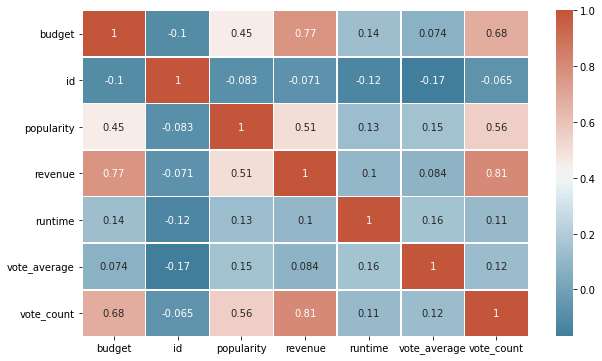

In [47]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

correlations = data.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations, annot= True, cmap=cmap, linewidth=.5)

In [51]:
data["revenue"]=pd.to_numeric(data["revenue"])

<AxesSubplot:>

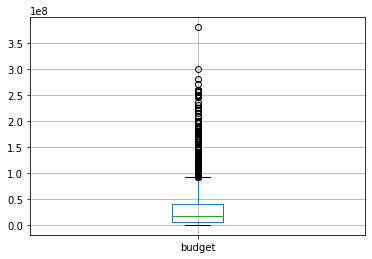

In [62]:
mycond1 = data['budget']>0
mycond2 = data['revenue']>0
mydata = data[mycond1 & mycond2]
#mydata['budget'].describe
mydata.boxplot(column=['budget'])

In [63]:
X = pd.DataFrame(mydata['budget'])
y = pd.DataFrame(mydata['revenue'])

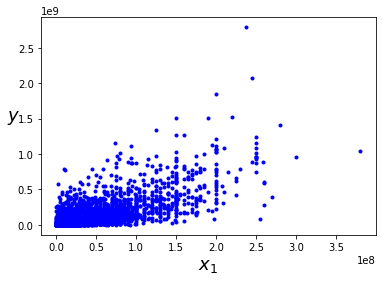

In [64]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [78]:
X = np.log(X)
y = np.log(y)

C:\Users\jungh\.conda\envs\test3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



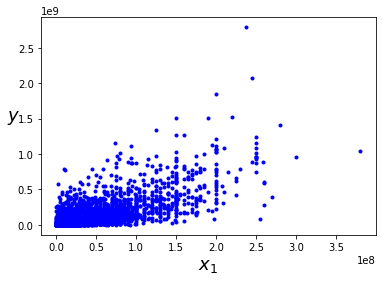

In [65]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [68]:
lin_reg.intercept_, lin_reg.coef_

(array([11575827.00416258]), array([[2.03186517e+00, 6.05287453e-09]]))

In [69]:
mydata.shape

(5365, 21)

C:\Users\jungh\.conda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jungh\.conda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jungh\.conda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jungh\.conda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


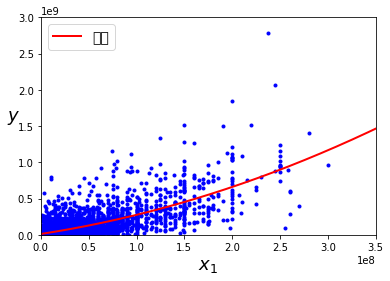

In [75]:
X_new=np.linspace(0, 350000000, 10000).reshape(10000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 350000000, 0, 3000000000])
plt.show()